## Data Exploration and Preprocessing

In [106]:
# Required paths
train_file_path = "/kaggle/input/spaceship-titanic/train.csv"
test_file_path = "/kaggle/input/spaceship-titanic/test.csv"
submission_file_path = "/kaggle/input/spaceship-titanic/sample_submission.csv"

In [107]:
# importing pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
# training dataset
train_df = pd.read_csv(train_file_path)

# test dataset
test_df = pd.read_csv(test_file_path)

#printing shapes of training and test set
print(f"Full train dataset shape is {train_df.shape} | Full test dataset shape is {test_df.shape}")

Full train dataset shape is (8693, 14) | Full test dataset shape is (4277, 13)


In [108]:
# printing info
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [109]:
#first 10 examples
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [110]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Transported
True     4378
False    4315
Name: count, dtype: int64


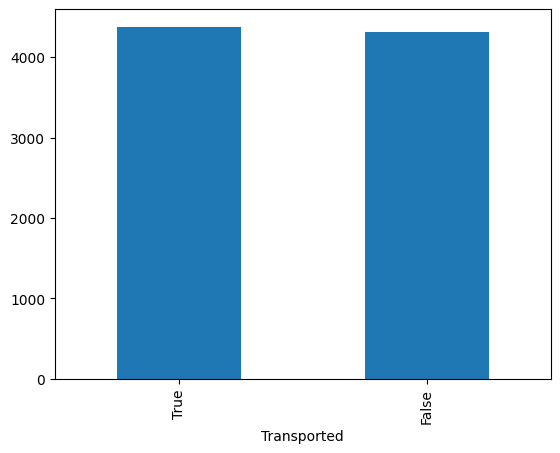

In [111]:
plot_df = train_df["Transported"].value_counts()
plot_df.plot(kind = "bar")
print(plot_df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

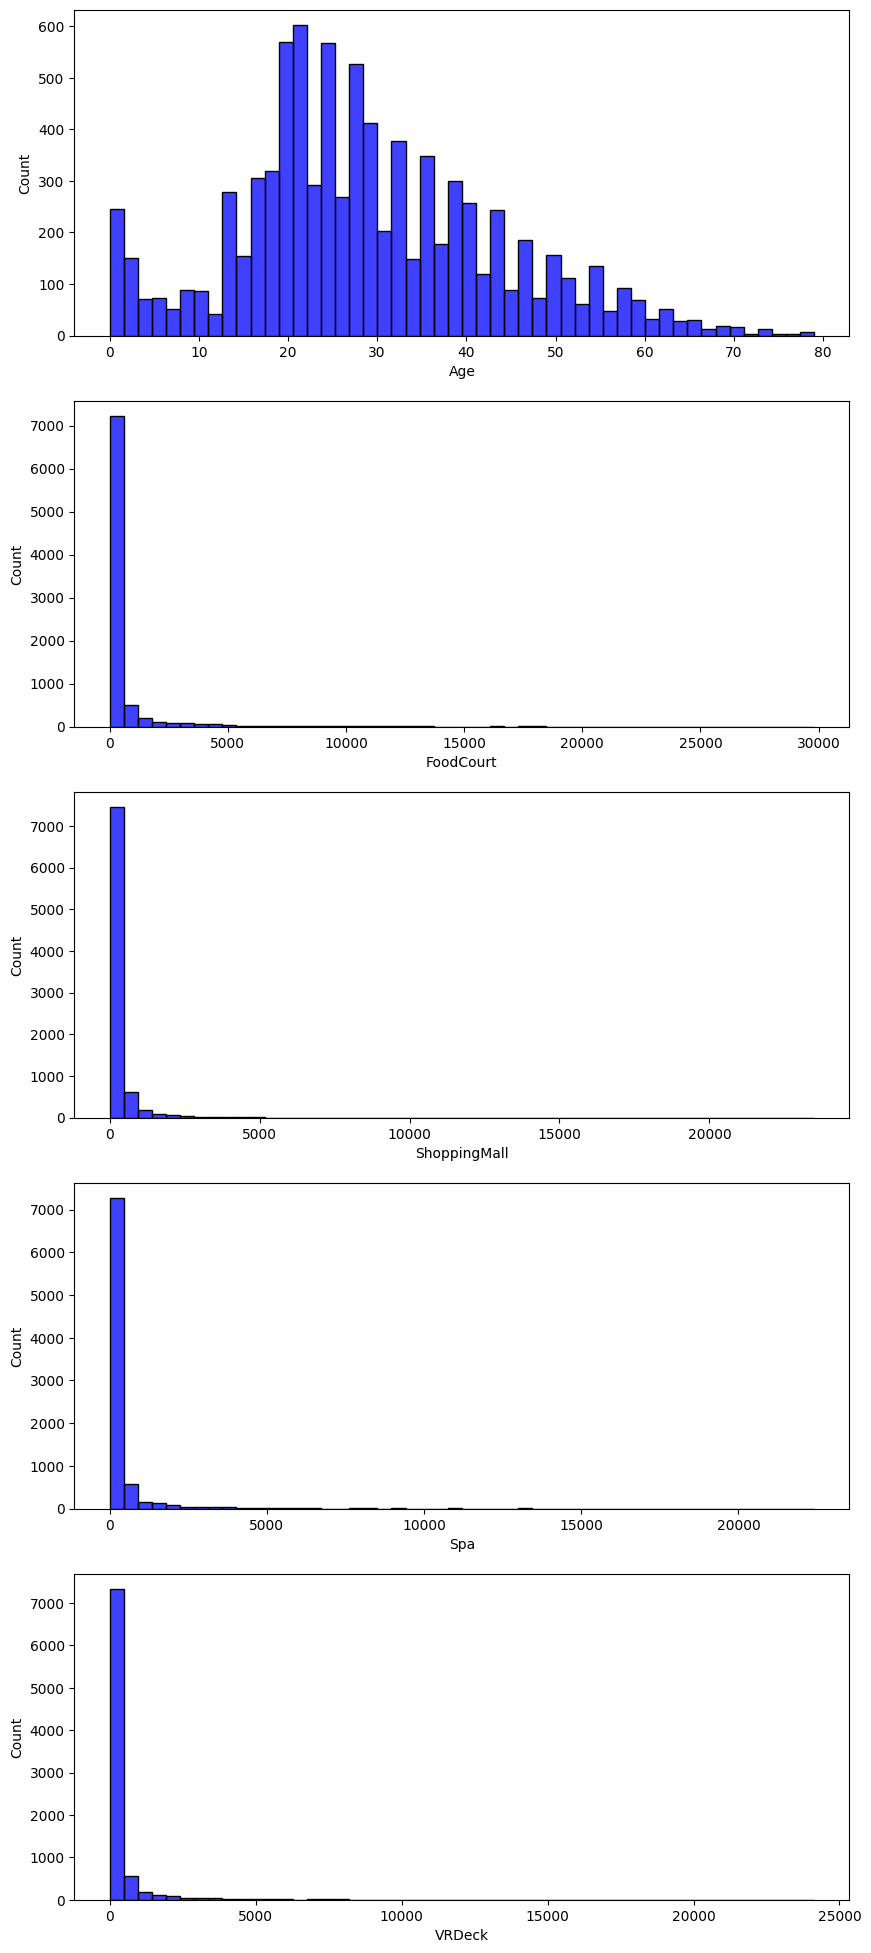

In [112]:
# plotting columns
fig, ax = plt.subplots(5,1, figsize = (10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(train_df['Age'], color = 'b', bins = 50, ax = ax[0]);
sns.histplot(train_df['FoodCourt'], color='b', bins = 50, ax = ax[1]);
sns.histplot(train_df['ShoppingMall'], color = 'b', bins = 50, ax = ax[2]);
sns.histplot(train_df['Spa'], color = 'b', bins = 50, ax = ax[3]);
sns.histplot(train_df['VRDeck'], color = 'b', bins = 50, ax = ax[4]);

In [113]:
# Preparing the dataset
train_df = train_df.drop(['PassengerId', 'Name'], axis = 1)
train_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [114]:
#checking for the null values
train_df.isnull().sum().sort_values(ascending = False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [115]:
train_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df[['VIP','CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value = 0)
train_df.isnull().sum().sort_values(ascending = False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [116]:
label = 'Transported'
train_df[label] = train_df[label].astype(int)

In [117]:
#converting type of vip and cryosleep
train_df['VIP'] = train_df['VIP'].astype(int)
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)

In [118]:
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


## Feature Engineering

In [119]:
# including new features from Cabin as it includes Deck/Cabin_num/Side
train_df[['Deck', 'Cabin_num', 'Side']] = train_df['Cabin'].str.split('/', expand = True)

In [120]:
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [121]:
try:
    train_df = train_df.drop('Cabin', axis = 1)
except KeyError:
    print('Field does not exist')

In [122]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [123]:
def split_dataset(dataset, test_ratio = 0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train_df)
print("{} examples in training. {} examples in testing. " .format(len(train_ds_pd), len(valid_ds_pd)))

6986 examples in training. 1707 examples in testing. 


In [124]:
train_ds_pd.shape
train_ds_pd.dtypes

HomePlanet       object
CryoSleep         int64
Destination      object
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
Deck             object
Cabin_num        object
Side             object
dtype: object

In [145]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#Encode categorical variables
label_encoders = {}
for col in ['HomePlanet', 'Destination', 'Deck', 'Cabin_num', 'Side']:
    label_encoders[col] = LabelEncoder()
    train_ds_pd[col] = label_encoders[col].fit_transform(train_ds_pd[col])
    
# convert to numpy arrays
features = train_ds_pd.drop(columns = ['Transported']).values
labels = train_ds_pd['Transported'].values.astype(float)

#converting to scaler values
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
# labels_reshape = labels.reshape(-1,1)
# labels_scaled = scaler.fit_transform(labels_reshape)

# convert numpy to pytorch tensors
features_tensor = torch.tensor(features_scaled, dtype = torch.float32)
labels_tensor = torch.tensor(labels, dtype = torch.float32)

/tmp/ipykernel_33/2343813920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds_pd[col] = label_encoders[col].fit_transform(train_ds_pd[col])
/tmp/ipykernel_33/2343813920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds_pd[col] = label_encoders[col].fit_transform(train_ds_pd[col])
/tmp/ipykernel_33/2343813920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [146]:
features_tensor

tensor([[0.3333, 0.0000, 0.6667,  ..., 0.1250, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6667,  ..., 0.6250, 0.0000, 0.5000],
        [0.3333, 0.0000, 0.6667,  ..., 0.0000, 0.0000, 0.5000],
        ...,
        [0.3333, 0.0000, 0.0000,  ..., 0.0000, 0.9874, 0.0000],
        [0.0000, 0.0000, 0.6667,  ..., 0.7500, 0.3065, 0.5000],
        [0.3333, 0.0000, 0.0000,  ..., 0.5000, 0.7563, 0.5000]])

In [147]:
labels_tensor

tensor([0., 1., 0.,  ..., 0., 1., 0.])

## Model Selection and Development

In [148]:
import torch.nn as nn
import torch.nn.functional as F

class SpaceshipTitanicModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SpaceshipTitanicModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [149]:
features.shape[1]

13

In [150]:
import torch
import torch.optim as optim

num_features = features.shape[1]

#instantiate the model
model = SpaceshipTitanicModel(input_size=num_features, hidden_size = 128, output_size = 1)

#Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)


In [151]:
print(features_tensor.shape)
# features_tensor

torch.Size([6986, 13])


In [152]:
print(labels_tensor)
print(labels_tensor.shape)
type(features_tensor)

tensor([0., 1., 0.,  ..., 0., 1., 0.])
torch.Size([6986])


torch.Tensor

In [153]:
print(labels_tensor.shape)
labelsun = labels_tensor.squeeze()
print(labelsun.shape)

torch.Size([6986])
torch.Size([6986])


In [154]:
output = model(features_tensor)
print(f"Outputs min: {output.min()}, Outputs max: {output.max()}")

Outputs min: nan, Outputs max: nan


In [156]:
#training loop

num_epochs = 100
for epoch in range(num_epochs):
    #forward pass
    outputs = model(features_tensor)
#     print(f"Outputs: {outputs}")
#     print(f"Outputs min: {outputs.min()}, Outputs max: {outputs.max()}")
    loss = criterion(outputs.squeeze(), labels_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

RuntimeError: all elements of input should be between 0 and 1

## Training and Validation

## Evaluation and Inference

## Iterative Improvement